In [7]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import tweepy
import json
import time

## Gathering Data

In [2]:
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
image_predictions=requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open("image-predictions.tsv" , 'w') as tsv_file :
    tsv_file.write(image_predictions.text)
image_predictions_df= pd.read_csv("image-predictions.tsv" , sep="\t")
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
consumer_key = 'l7vN75whq8uwpldDfncePHqU2'
consumer_secret = 'J8KPIu9LV7rerBerPCN1eXaCMEwaqEXCc1uMAX1HwAwVVt18u9'
access_token = '1106858217613725697-oxRrd3Kt2XzlJSFl4V5ueGvIiiosba'
access_secret = '669libjWJDB720KucgNmFmfFqIZfnu8EyAZu3Z4EX5kPL'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

In [ ]:
with open("tweet_json.txt",'w') as json_output_file:
    for row_num , tweet_id in enumerate(df.tweet_id):
        try:
            twitter_post = api.get_status(str(tweet_id) ,tweet_mode='extended', wait_on_rate_limit =True , wait_on_rate_limit_notify=True)
            twitter_post_json = json.dumps(twitter_post._json)
            json_output_file.write(twitter_post_json+'\n')
        except Exception as ex:
            template = "An exception of type {0} occurred. Arguments:\n{1!r}"
            message = template.format(type(ex).__name__, ex.args)

In [4]:
with open("tweet_json.txt",'r') as json_file_txt:
    data_frame=[]
    for line in json_file_txt:
        line= json.loads(line)
        data_frame.append([line["id"],line["retweet_count"],line["favorite_count"],line["full_text"]])

In [5]:
additional_data_df= pd.DataFrame(data_frame,columns=["tweet_id","retweet_count" ,"favorite_count","full_text"]) 
additional_data_df.to_csv("addtional_twitter_data.csv", sep=",",index=None)
additional_data_df = pd.read_csv("addtional_twitter_data.csv",sep=",")
additional_data_df.head()

,tweet_id,retweet_count,favorite_count,full_text
0,892420643555336193,8221,37731,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6077,32404,This is Tilly. She's just checking pup on you....
2,891815181378084864,4022,24401,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8376,41040,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9079,39238,This is Franklin. He would like you to stop ca...


## Assessing

### twitter-archive-enhanced Assessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Completeness**
The following columns has missing data
1. expanded_urls
2. in_reply_to_status_id
3. in_reply_to_user_id
4. retweeted_status_id
5. retweeted_status_user_id
6. retweeted_status_timestamp

In [222]:
df.doggo.value_counts(), df.floofer.value_counts(),df.pupper.value_counts(),df.puppo.value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

**completeness**
The Dog stages has alot of missing data stages    
**column headers for dog stages should be values**

In [8]:
df.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
Bailey            7
an                7
Toby              7
Buddy             7
Milo              6
Rusty             6
Dave              6
Bella             6
Scout             6
Stanley           6
Leo               6
Jax               6
Oscar             6
Koda              6
Jack              6
Oakley            5
               ... 
Kaia              1
Lambeau           1
Stella            1
Bonaparte         1
Spark             1
Ronnie            1
Ike               1
Evy               1
Marq              1
Iroh              1
Rorie             1
Pilot             1
Blakely           1
Banjo             1
unacceptable      1
Karma             1
Tedders           1
Brat              1
Keet              1


**Names**   
* There are 745 names that are none, this is incomplete data    
* Also there are 55 names who have the name a. I suppose that this is not correct.
* And one name is my. which I also suppose is wrong.

In [9]:
sum(df.tweet_id.duplicated())

0

All tweet_IDs are unque and therefor we can infere that there is no duplicated row data in thi data frame

In [10]:
df[["rating_numerator","rating_denominator"]].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


**VALIDITY**    
* Denominator is not always 10    
* Numerator is not has some very large numbers

In [11]:
df.query('tweet_id in retweeted_status_id',engine='python')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
126,868552278524837888,NaN,NaN,2017-05-27 19:39:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Cooper. His expression is the sam...,NaN,NaN,NaN,"https://www.gofundme.com/3ti3nps,https://twitt...",12,10,Cooper,None,None,None,None
150,863062471531167744,NaN,NaN,2017-05-12 16:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Quinn. She's quite the goofball. ...,NaN,NaN,NaN,"https://www.gofundme.com/helpquinny,https://tw...",13,10,Quinn,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
253,844704788403113984,NaN,NaN,2017-03-23 00:18:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. It's her first time outside and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844704788...,13,10,Luna,None,None,None,None
264,842163532590374912,NaN,NaN,2017-03-16 00:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet George. He looks slightly deflated but ov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/842163532...,12,10,George,None,None,None,None
271,841077006473256960,NaN,NaN,2017-03-13 00:02:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dawn. She's just checking pup on you. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None,None,None,None
280,839549326359670784,NaN,NaN,2017-03-08 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He knows he's a little too big f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,None,None,None,None


Some of the rows are retweets.

In [12]:
df.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
Bailey            7
an                7
Toby              7
Buddy             7
Milo              6
Rusty             6
Dave              6
Bella             6
Scout             6
Stanley           6
Leo               6
Jax               6
Oscar             6
Koda              6
Jack              6
Oakley            5
               ... 
Kaia              1
Lambeau           1
Stella            1
Bonaparte         1
Spark             1
Ronnie            1
Ike               1
Evy               1
Marq              1
Iroh              1
Rorie             1
Pilot             1
Blakely           1
Banjo             1
unacceptable      1
Karma             1
Tedders           1
Brat              1
Keet              1


There are some missing names and some names that are 'a' and 'an'. The 'a' and 'an' names are maybe due to a bug in the code that extracts the names. It taken the work that is after "This is". 

In [58]:
count_list=[]
for row in df.iterrows():
    count=0
    if row[1]["doggo"]  != "None":
        count+=1
    if row[1]["floofer"] != "None":
        count+=1
    if row[1]["pupper"] != "None":
        count+=1
    if row[1]["puppo"] != "None":
        count+=1
    count_list.append(count)
unique,counts= np.unique(np.array(count_list) , return_counts=True)
dict(zip(unique,counts))

{0: 1976, 1: 366, 2: 14}

There are rows that have more than one dog stage for the same dog.

### Image predictions data frame

In [232]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Not all entries of the original dataframe will have the type of the dog.

In [233]:
image_predictions_df.p1_dog.value_counts() ,image_predictions_df.p2_dog.value_counts() ,image_predictions_df.p3_dog.value_counts()

(True     1532
 False     543
 Name: p1_dog, dtype: int64, True     1553
 False     522
 Name: p2_dog, dtype: int64, True     1499
 False     576
 Name: p3_dog, dtype: int64)

In [234]:
image_predictions_df[image_predictions_df["p1_dog"]==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


Some of the predictions of dog breeds doesn't say that this is even a dog.

### Scrapped twitter data

In [16]:
additional_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 4 columns):
tweet_id          2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
full_text         2339 non-null object
dtypes: int64(3), object(1)
memory usage: 73.2+ KB


In [17]:
additional_data_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.339000e+03,2339.000000,2339.000000
mean,7.421620e+17,2899.082086,7887.812313
std,6.828729e+16,4888.514197,12224.004701
min,6.660209e+17,0.000000,0.000000
25%,6.783378e+17,583.000000,1366.500000
50%,7.186133e+17,1353.000000,3431.000000
75%,7.986907e+17,3379.000000,9658.500000
max,8.924206e+17,82862.000000,162830.000000


There are some very big number in favorite count and retweet counts compared to 75th percentile.

### Quality:
#### `Twitter archieve` table
1. Some of the tweets are re-tweets and need to be removed
2. Denominator is not always equal to 10
3. remove the denominator column, because after cleaning all the values should be equal to 10. Thus this column will not provide any additional information
4. In the source column there are anchor tags that can be removed.
5. Some names are 'a','an' and 'my' this can be due to the way the names were extracted.
6. There are some rows that have multiple dog stages in it.

#### `Image_predictions` table
1. Not all images contain dogs in them, so we will remove any entery that has a p1_dog is False as this is most likely is not a dog. Although some of them are dogs but most of them aren't.
2. Remove P2 and P3 columns as we are going to use the most likely prediction only.
3. rename P1 to dog_breed as this is more descriptive

#### `additional_data`Data
1. There are very large number in favourite counts and retweet-counts. Those numbers are way too big compared to the 75 percentile. 

### Tidiness:
#### `Twitter archieve` table
1. After We remove the re-tweet rows we can remove any column that is related to re-tweets( re-tweet time stamp, re-tweet status_id, re-tweet_user_id) As this will serve No use in our dataset because we are focused on only the main tweets and no re-tweets.
2. doggo,floofer, puuper and puppo are values not variable names. In other words those column need to be converted from a wide format to a long format.

## Clean

In [247]:
df_clean=df.copy()
image_predictions_df_clean= image_predictions_df.copy()
additional_data_df_clean=additional_data_df.copy()

**Define:**  Remove all retweeets by removing any row with a tweet_id that is in the retweeted_status_id column    

**Code**

In [248]:
df_clean=df_clean.query("tweet_id not in retweeted_status_id")
df_clean = df_clean.reset_index(drop=True)

**Test**

In [249]:
df_clean.query("tweet_id in retweeted_status_id")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Define**    
For the rows that has two dog stages, I will only choose one stage according to the context of the tweet. And remove any images that have the two dogs in them with different stages.

**Code**

In [250]:
IDS=[]
for row in df_clean.iterrows():
    count=0
    if row[1]["doggo"]  != "None":
        count+=1
    if row[1]["floofer"]!= "None":
        count+=1
    if row[1]["pupper"] != "None":
        count+=1
    if row[1]["puppo"]  != "None":
        count+=1
    if count >1:
        IDS.append(row[1]["tweet_id"])
len(IDS)

12

In [251]:
query = additional_data_df_clean.query("tweet_id in @IDS")

In [252]:
for row in query.iterrows():
    print(row[1]["full_text"])

Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.

In [253]:
#Choose only one stage for those rows
df_clean.loc[df_clean[df_clean["tweet_id"] == query.iloc[0]["tweet_id"]].index[0], 'doggo']= "None"
df_clean.loc[df_clean[df_clean["tweet_id"] == query.iloc[1]["tweet_id"]].index[0], 'floofer']= "None"
df_clean.loc[df_clean[df_clean["tweet_id"] == query.iloc[2]["tweet_id"]].index[0], 'doggo']= "None"
df_clean.loc[df_clean[df_clean["tweet_id"] == query.iloc[5]["tweet_id"]].index[0], 'doggo']= "None"

In [254]:
#remove any row that has more the 
IDS_to_remove = list(query.iloc[[3,4,6,7,8,9,10,11]]["tweet_id"])
df_clean = df_clean.query("tweet_id not in @IDS_to_remove")

**Test**

In [255]:
IDS=[]
for row in df_clean.iterrows():
    count=0
    if row[1]["doggo"]  != "None":
        count+=1
    if row[1]["floofer"]!= "None":
        count+=1
    if row[1]["pupper"] != "None":
        count+=1
    if row[1]["puppo"]  != "None":
        count+=1
    if count >1:
        IDS.append(row[1]["tweet_id"])
len(IDS)

0

**Define**   
Change the names that are ['a','an'] to None as most probably the names of those rows are not given. Change the name 'my' to Zoey as this is the actual name of this dog, that can be found when you read the text of this twitter post.

**Code**

In [256]:
additional_data_df_clean[additional_data_df_clean['tweet_id']==df_clean.query("name == 'my'")["tweet_id"].values[0]]

,tweet_id,retweet_count,favorite_count,full_text
837,765395769549590528,3645,27817,This is my dog. Her name is Zoey. She knows I'...


In [257]:
query = df_clean.query("name == 'my'").index
df_clean.loc[query[0],"name"]="Zoey"

In [258]:
query2 = df_clean.query("name == 'a' | name=='an'").index
df_clean.loc[query2,"name"] ="None"

**Test**

In [259]:
df_clean.loc[query[0]]

tweet_id                                                     765395769549590528
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2016-08-16 03:52:26 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is my dog. Her name is Zoey. She knows I'...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/765395769...
rating_numerator                                                             13
rating_denominator                                                           10
name                                    

In [260]:
df_clean.query("name == 'a' | name=='an'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Define**   
remove anchor tags from source by string spliting.

**Code**

In [261]:
df_clean.source= df_clean.source.apply(lambda x: x.split("\"")[1])

**Test**

In [262]:
df.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

**Define**   
* scrape the denominator and the numerator properly from the additional data column for the tweet_ids that have It's denominator something other than 10.    
* Not all tweet_ids have a rating so those who doesn't will get a numerator and a denominator equal to non and will be removed from the table

**Code**

In [263]:
IDs_with_wring_denominator = df_clean[df_clean['rating_denominator'] != 10]['tweet_id'].values
df_clean_index = df_clean[df_clean['rating_denominator'] != 10].index

In [264]:
tmp_data= additional_data_df_clean.query("tweet_id in @IDs_with_wring_denominator")
tmp_data[["rating_numerator","rating_denominator"]]= tmp_data["full_text"].str.extract("(\d+)/(10)")

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [265]:
for row in tmp_data.iterrows():
    df_clean.loc[df_clean["tweet_id"]==row[1]["tweet_id"] , ["rating_numerator" , "rating_denominator"]]=row[1][["rating_numerator" , "rating_denominator"]]

In [266]:
df_clean =df_clean[df_clean.rating_denominator.notnull()]
#remove denominator not equal to 10 and also the Id is not found in the additional_data frame
df_clean = df_clean[df_clean['rating_denominator'] == 10] 
df_clean = df_clean.reset_index(drop=True)

**Test**

In [267]:
df_clean.rating_denominator.value_counts()

10.0    2213
Name: rating_denominator, dtype: int64

In [268]:
df_clean[df_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Define**   
* Remove all rows that has a False in p1_dog as this is probably not a dog
* Remove columns that will not be used (any column other than tweet_id,P1

**Code**

In [269]:
image_predictions_df_clean = image_predictions_df_clean[image_predictions_df_clean["p1_dog"]==True][["tweet_id","p1"]]

**Test**

In [270]:
image_predictions_df_clean.head()

,tweet_id,p1
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


**Define**    
* Rename p1 column to dog_breed as this is more descriptive

**Code**

In [271]:
image_predictions_df_clean.rename(columns={'p1':'dog_breed'},inplace=True)

**Test**

In [272]:
image_predictions_df_clean.columns

Index(['tweet_id', 'dog_breed'], dtype='object')

## Tidiness

**Define**   
Remove any column that has no additional value after cleaning. specifically I will remove those columns ["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","rating_denominator"]

**Code**

In [273]:
df_clean = df_clean.loc[:, ~df_clean.columns.isin(["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp","rating_denominator"])]

**Test**

In [274]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,None,None,None


**Define**   
Change the doggo,floofer, pupper and puppo columns from wide to long format by using the melt function

**code**

In [275]:
dog_stage = []
for row in df_clean.iterrows():
    if row[1]["doggo"] != "None":
        dog_stage.append("doggo")
        continue
    if row[1]["floofer"] != "None":
        dog_stage.append("floofer")
        continue
    if row[1]["pupper"] != "None":
        dog_stage.append("pupper")
        continue
    if row[1]["puppo"] != "None":
        dog_stage.append("puppo")
        continue
    dog_stage.append("None")  

In [276]:
df_clean["dog_stage"]=dog_stage

In [277]:
df_clean = df_clean[df_clean.columns[~df_clean.columns.isin(["doggo","floofer","pupper","puppo"])]]

**Test**

In [278]:
df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None


## Merging the 3 datasets together into one master table

In [296]:
df_master =pd.merge(df_clean, image_predictions_df_clean, on='tweet_id', how='inner')

In [297]:
df_master = pd.merge(df_master,
                     additional_data_df_clean[["tweet_id","retweet_count","favorite_count"]],
                     on='tweet_id', how='inner')

In [301]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,dog_breed,retweet_count,favorite_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,Chihuahua,6077,32404
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,Chihuahua,4022,24401
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,basset,9079,39238
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,None,None,Chesapeake_Bay_retriever,3011,19727
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,Jax,None,Appenzeller,1989,11535


In [302]:
df_master.to_csv("twitter_archive_master.csv", index=False)

## Visualizations

In [8]:
df_master= pd.read_csv("twitter_archive_master.csv")
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,dog_breed,retweet_count,favorite_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,Chihuahua,6077,32404
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,Chihuahua,4022,24401
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,basset,9079,39238
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,None,None,Chesapeake_Bay_retriever,3011,19727
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,Jax,None,Appenzeller,1989,11535


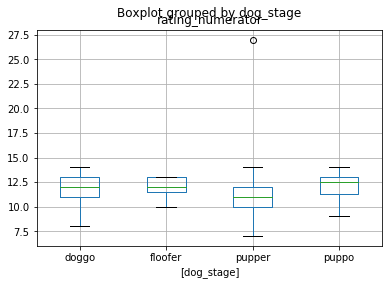

In [9]:
df_master[df_master["dog_stage"]!="None"].boxplot(column=["rating_numerator"],  by= ["dog_stage"])

> * on average a puppo gets the highest ratings while the puppe gets the lowest ratings. Also you can see that the spread of the puppo is not large. 
* Also notice theie is an outlier in the pupper that could drag the average rating up, but we are using the median when we use boxplots so this visualization is not affected by this outlier. 

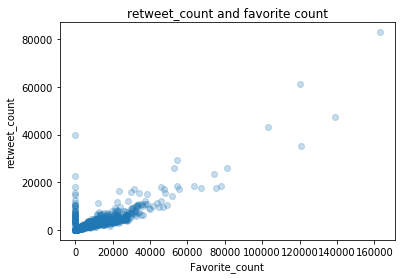

In [10]:
plt.title("retweet_count and favorite count")
plt.ylabel("retweet_count")
plt.xlabel("Favorite_count")
plt.scatter(df_master['favorite_count'], df_master['retweet_count'],alpha=1/4)
plt.show()

> We see as the retweet count increase, the favorite count also increase thus there is a positive linear relationship between the two varibles

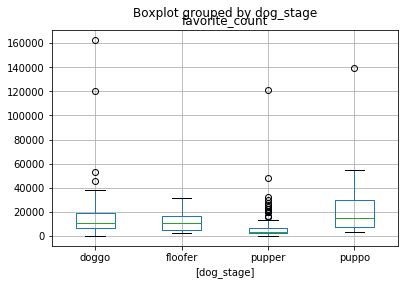

In [11]:
df_master[df_master["dog_stage"]!="None"].boxplot(column=["favorite_count"],  by= ["dog_stage"])

> Although puppers had the highest rating they have the lowest favorite counts. and puppos have the highest favorite counts on average. This was unexpected as puppers had a higher rating thus expected to have a higher favorite count.

In [34]:
query = df_master[["rating_numerator", "dog_breed"]].groupby("dog_breed").median().sort_values('rating_numerator', ascending=False)
query

,rating_numerator
dog_breed,
clumber,27.0
Afghan_hound,13.0
giant_schnauzer,13.0
Saluki,13.0
briard,12.5
golden_retriever,12.0
Tibetan_mastiff,12.0
Irish_setter,12.0
Leonberg,12.0
